In [1]:
import pandas as pd  #manipulation des donnees
import numpy as np   #calcul mathematiques
import seaborn as sns   #visualiser les données
import matplotlib.pyplot as plt  #visualisation
import scipy as scipy   # faire des statistques et des probabilités
import plotly.express as px


%matplotlib inline
import plotly.graph_objs as go
from  plotly.offline import plot
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot


PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [2]:
fichier="../data/PoliceDeaths.csv"
data = pd.read_csv(fichier, index_col=None)


In [3]:
data.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


In [4]:
data.shape

(22800, 10)

In [5]:
data.info() #22800 personnes en tout avec 9 informations par personne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person       22800 non-null  object
 1   dept         22800 non-null  object
 2   eow          22800 non-null  object
 3   cause        22800 non-null  object
 4   cause_short  22800 non-null  object
 5   date         22800 non-null  object
 6   year         22800 non-null  int64 
 7   canine       22800 non-null  bool  
 8   dept_name    22800 non-null  object
 9   state        22800 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 1.6+ MB


In [6]:
data.isna().sum() #il ne nous manque aucune données

person         0
dept           0
eow            0
cause          0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

In [7]:
nb_data=data.shape[1]*data.shape[0]
nb_data
#Nombre de données totales

228000

In [11]:
data.duplicated().sum() 

0

In [12]:
data.describe() 

,year
count,22800.000000
mean,1951.751272
std,38.233234
min,1791.000000
25%,1924.000000
50%,1952.000000
75%,1983.000000
max,2016.000000


In [13]:
data.canine.value_counts()  #"nombre de valeurs canine

False    22537
True       263
Name: canine, dtype: int64

In [14]:
data.canine.value_counts(normalize=True)*100 #Transformation %

False    98.846491
True      1.153509
Name: canine, dtype: float64

<AxesSubplot:ylabel='canine'>

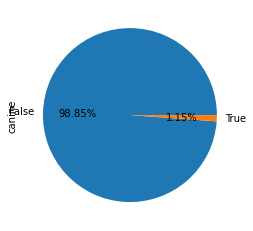

In [15]:
data.canine.value_counts().plot(kind="pie", autopct='%1.2f%%')

<AxesSubplot:ylabel='state'>

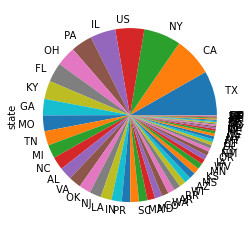

In [16]:
data.state.value_counts().plot(kind="pie") #L'état comprenant le plus de morts de policiers est le Texas, suivi par 
#la Californie et l'état de New York

<AxesSubplot:ylabel='cause_short'>

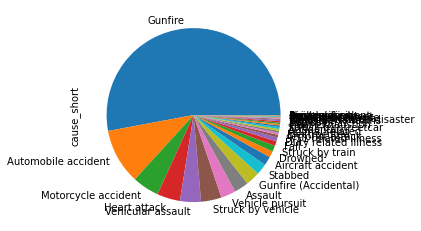

In [17]:
data.cause_short.value_counts().plot(kind="pie") #On peut voir que la cause de mort principale sont les armes à feu, ensuite les accidents de voiture.

# Impact de la localisation (par état et par emplacement)

In [18]:
data['state'].value_counts()

 TX    1880
 CA    1639
 NY    1574
 US    1225
 IL    1073
 PA     901
 OH     834
 FL     820
 KY     772
 GA     698
 MO     666
 TN     607
 MI     574
 NC     549
 AL     537
 VA     523
 OK     496
 NJ     485
 LA     470
 IN     434
 PR     363
 SC     362
 MA     360
 MD     325
 CO     305
 WA     290
 AR     284
 RR     280
 WI     275
 AZ     273
 MS     261
 KS     257
 MN     244
 WV     208
 IA     197
 OR     182
 NM     151
 CT     144
 DC     128
 UT     128
 MT     128
 NV     120
 NE     110
 ME      86
 ID      64
 WY      57
 HI      56
 ND      55
 SD      53
 TR      51
 RI      50
 AK      48
 NH      46
 DE      41
 VT      26
 VI      14
 GU      12
 CZ       3
 AS       3
 MP       3
Name: state, dtype: int64

In [17]:
state_data = pd.DataFrame()
state_data = data.state.value_counts().rename_axis('state_code').reset_index(name='number_of_deaths')
state_data['state_code'] = state_data['state_code'].astype(str)
state_data['number_of_deaths'] =  state_data['number_of_deaths'].astype(float)
state_data.describe()

,number_of_deaths
count,60.000000
mean,380.000000
std,417.677071
min,3.000000
25%,62.250000
50%,267.000000
75%,526.500000
max,1880.000000


In [19]:
state_data['state_code'] = state_data['state_code'].str.replace(' ','')

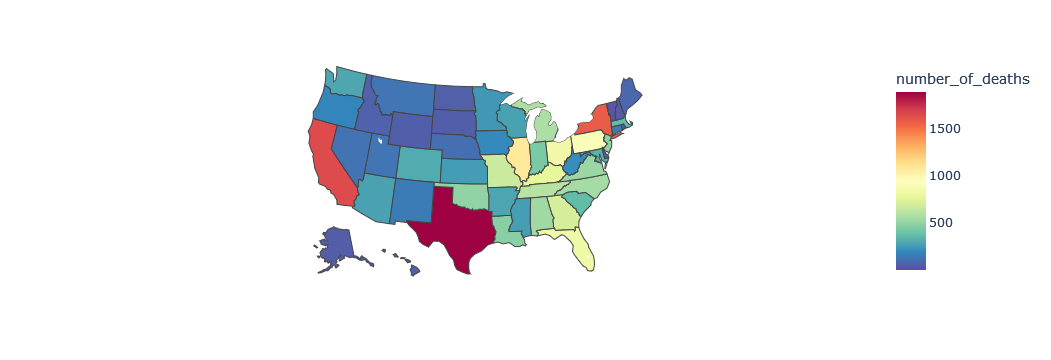

In [20]:
fig = px.choropleth(state_data,
                    locations='state_code',
                    color='number_of_deaths',
                    color_continuous_scale='spectral_r',
                    locationmode='USA-states',
                    labels={'Nombre de morts':'number_of_deaths'},
                    scope='usa')
fig.show()

### On observe sur cette carte la répartition géographique du nombres de morts de policiers selon l'état. On ne peut pas vraiment conclure d'une corrélation entre la situation géopgraphique d'un état et son nombre de policiers tués en service.

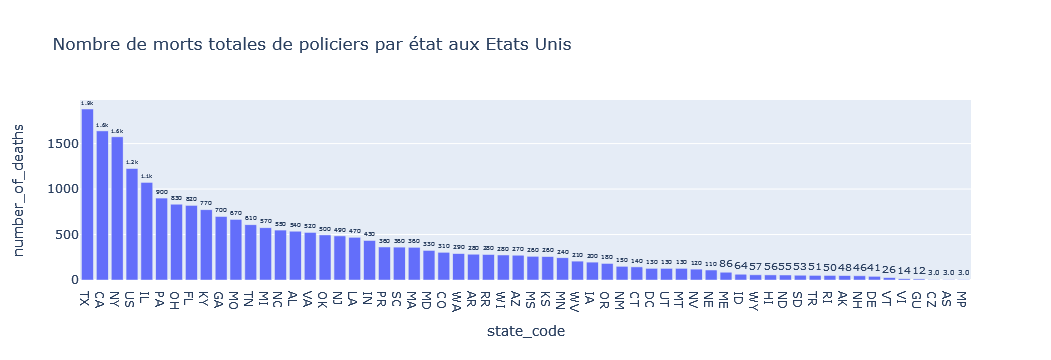

In [ ]:
fig = px.bar(state_data, x='state_code', y='number_of_deaths', text_auto='.2s',title="Nombre de morts totales de policiers par état aux Etats Unis")
fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### L'état du Texas est l'état qui comporte le plus de morts de policiers totales au cours de ce siècle dernier avec plus de 1900 décès totaux. 

## Etude par années

In [24]:
data['year'].value_counts()

1930    323
1927    305
1932    301
1931    296
1924    289
       ... 
1824      1
1827      1
1828      1
1830      1
1792      1
Name: year, Length: 202, dtype: int64

In [25]:
year_data = pd.DataFrame()
year_data = data['year'].value_counts().rename_axis('year').reset_index(name='number_of_deaths').sort_values(by='year')

In [26]:
year_data

,year,number_of_deaths
181,1791,2
201,1792,1
186,1794,1
187,1797,1
188,1804,1
...,...,...
67,2012,157
85,2013,141
62,2014,165
68,2015,157


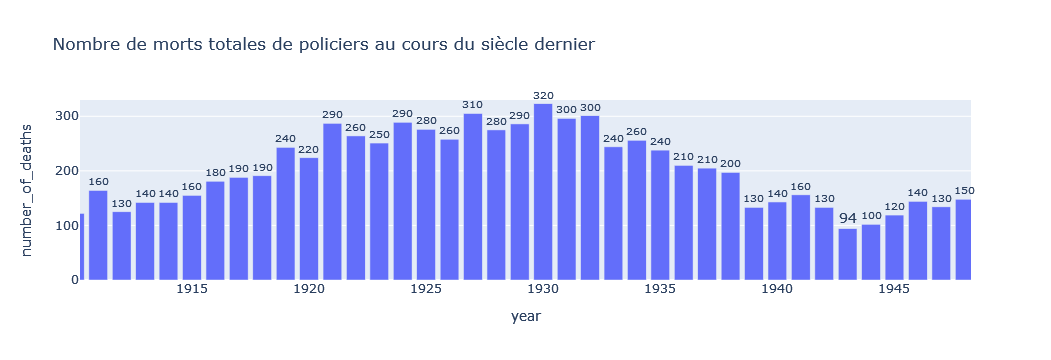

In [61]:
fig = px.bar(year_data, x='year', y='number_of_deaths', text_auto='.2s',title="Nombre de morts totales de policiers au cours du siècle dernier")
fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### On remarque que l'année 1930 a été la plus meurtrière pour les policiers aux Etats unis avec 323 morts de policiers pendant leur service. Cela peut s'expliquer par la surcharge de travail de la police d'état à cette époque. D'après un rapport de la police de New Jersey, "Dans les années 1930, il n'était pas rare que les policiers travaillent de douze à seize heures par jour, sans jour de repos, parfois plusieurs semaines d'affilée, pour accomplir leur mission de protection et de service." https://nj.gov/njsp/about/history/1930s.shtml

In [36]:
statebyyear_data = pd.DataFrame()
statebyyear_data = (data['state'].where(data['year'] == 1930)).value_counts()

In [37]:
statebyyear_data

 NY    37
 IL    27
 US    21
 TX    18
 OK    17
 MI    15
 PA    11
 CA    11
 NJ    10
 TN     9
 RR     9
 VA     9
 MA     8
 MO     8
 KY     7
 OH     7
 FL     7
 IA     7
 IN     6
 NC     6
 GA     6
 KS     6
 WI     6
 MN     5
 LA     4
 WA     4
 AL     4
 WV     3
 ME     3
 OR     3
 PR     3
 AR     3
 NE     3
 CT     3
 CO     2
 RI     2
 NM     2
 DC     2
 MS     2
 ND     2
 MD     1
 AZ     1
 HI     1
 SC     1
 MT     1
Name: state, dtype: int64

### On peut observer que cette année là, en 1930, c'est l'état de New York qui présente le plus de morts de policiers.

In [59]:
ny_causes = pd.DataFrame()
ny_causes = data['cause_short'][(data.year == 1930) & (data.state.str.contains('NY'))].value_counts()
ny_causes= ny_causes.rename_axis('cause').reset_index(name='number_of_deaths')

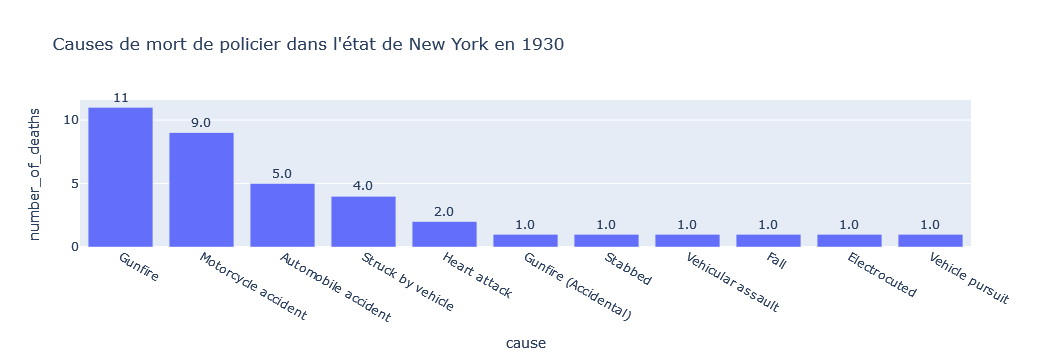

In [63]:
fig = px.bar(ny_causes, x='cause', y='number_of_deaths', text_auto='.2s',title="Causes de mort de policier dans l'état de New York en 1930")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### La plupart de ces morts sont dues à des armes à feu, ce sont donc des policiers tombés lors de leur service durant des fusillade ou attaques à armes à feu.